In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

STYLE = "#ffffff"

In [91]:
VOID_DIM = 15

void = np.zeros((VOID_DIM, VOID_DIM, VOID_DIM))

void[0].shape

(15, 15)

In [92]:
element = np.ones((random.randrange(ELEMENT_MIN_SIDE, ELEMENT_MAX_SIDE, STEP), random.randrange(ELEMENT_MIN_SIDE, ELEMENT_MAX_SIDE, STEP)))

element.shape

(3, 5)

In [93]:
def working_plane(plane = "XY"):
    if plane == "XY":
        dimention = 0
    if plane == "YZ":
        dimention = 1
    if plane == "ZX":
        dimention = 2
    return dimention

In [94]:
def find_plane_boundries(void, element):# change values for other planes
    boundry_top = int(element.shape[0] / 2)

    boundry_bottom = int(void[0].shape[0]) - int(element.shape[0] / 2)

    boundry_left = int(element.shape[1] / 2)

    boundry_right = int(void[0].shape[1]) - int(element.shape[1] / 2)
    
    return [boundry_top, boundry_bottom], [boundry_left, boundry_right]

find_plane_boundries(void, element)

([1, 14], [2, 13])

In [95]:
np.random.randint(low = 0, high = 11)

2

In [96]:
find_plane_boundries(void, element)[1]

[2, 13]

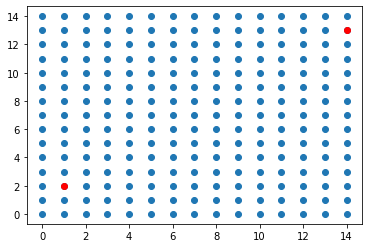

In [102]:
SOLID_DIM = 15

solid = np.ones((SOLID_DIM, SOLID_DIM))

space = np.array(solid.nonzero())

plt.scatter(space[0], space[1])

plt.scatter(find_plane_boundries(void, element)[0], find_plane_boundries(void, element)[1], color = "red")

In [101]:
def find_plane_slices(boundry_I, boundry_J, element):
    
    random_coor_top_left = [np.random.randint(low = 0, high = (boundry_I-1)), np.random.randint(low = 0, high = (boundry_J-1))] # random top left corner, [0, I_boundry] [0, J_boundry]
      
    coor_bottom_right = [random_coor_top_left[0] + (element.shape[0]), random_coor_top_left[1] + (element.shape[1])] # adds the shape of the element to find bottom right corner
    
    return random_coor_top_left, coor_bottom_right # returns coordinates of the opposite corners of the array, to slide

In [99]:
boundries = find_plane_boundries(void, element)

print(f"Boundries are {boundries}")

slices = find_plane_slices(boundries[1][0], boundries[1][1], element)

print(f"Slices are {slices}")

print(f"element shape {element.shape}")

Boundries are ([1, 14], [2, 13])
Slices are ([0, 10], [2, 14])
element shape (3, 5)


In [100]:
void[0][int(slices[0][0]):int(slices[1][0]), int(slices[0][1]):int(slices[1][1])] = element

void[0]

ValueError: could not broadcast input array from shape (3,5) into shape (2,4)

In [86]:
#volumes

In [87]:
ELEMENT_MIN_SIDE = 3 # impar
ELEMENT_MAX_SIDE = 9 # impar
STEP = 2 # to keep it impar

VOID_DIM = 15

NUMBER_PLANES_X = np.random.randint(low = 3, high = 6)
NUMBER_PLANES_Y = np.random.randint(low = 3, high = 6)
NUMBER_PLANES_Z = np.random.randint(low = 3, high = 6)

In [103]:
void = np.zeros((VOID_DIM, VOID_DIM, VOID_DIM))

for plane in ["XY","YZ","ZX"]:
    
    if working_plane(plane) == 0:
        for plane in range(NUMBER_PLANES_X):
            Z = random.randrange(0, 15)
            plane = np.ones((random.randrange(ELEMENT_MIN_SIDE, ELEMENT_MAX_SIDE, STEP), random.randrange(ELEMENT_MIN_SIDE, ELEMENT_MAX_SIDE, STEP)))
            print("############################################## PLANE Z ###")
            print(f"Void shape: {void.shape}")
            print("----------------------------------------------------------")
            print(plane)
            print("----------------------------------------------------------")
            print(f"Plane shape is: {plane.shape}")
            print("----------------------------------------------------------")
            boundries = find_plane_boundries(void, plane)
            print(f"Plane boundries are: {boundries}")
            print("----------------------------------------------------------")
            slices = find_plane_slices(boundries[1][0], boundries[1][1], plane)
            print(f"Slices are: {slices}")
            print("##########################################################")
            print("")
            void[:,:,Z][int(slices[0][0]):int(slices[1][0]), int(slices[0][1]):int(slices[1][1])] = plane
            
    elif working_plane(plane) == 1:
        for plane in range(NUMBER_PLANES_Y):
            X = random.randrange(0, 15)
            plane = np.ones((random.randrange(ELEMENT_MIN_SIDE, ELEMENT_MAX_SIDE, STEP), random.randrange(ELEMENT_MIN_SIDE, ELEMENT_MAX_SIDE, STEP)))
            print("############################################## PLANE X ###")
            print(f"Void shape: {void.shape}")
            print("----------------------------------------------------------")
            print(plane)
            print("----------------------------------------------------------")
            print(f"Plane shape is: {plane.shape}")
            print("----------------------------------------------------------")
            boundries = find_plane_boundries(void, plane)
            print(f"Plane boundries are: {boundries}")
            print("----------------------------------------------------------")
            slices = find_plane_slices(boundries[1][0], boundries[1][1], plane)
            print(f"Slices are: {slices}")
            print("##########################################################")
            print("")
            void[X,:,:][int(slices[0][0]):int(slices[1][0]), int(slices[0][1]):int(slices[1][1])] = plane

    else:
        for plane in range(NUMBER_PLANES_Z):
            Y = random.randrange(0, 15)
            plane = np.ones((random.randrange(ELEMENT_MIN_SIDE, ELEMENT_MAX_SIDE, STEP), random.randrange(ELEMENT_MIN_SIDE, ELEMENT_MAX_SIDE, STEP)))
            print("############################################## PLANE Y ###")
            print(f"Void shape: {void.shape}")
            print("----------------------------------------------------------")
            print(plane)
            print("----------------------------------------------------------")
            print(f"Plane shape is: {plane.shape}")
            print("----------------------------------------------------------")
            boundries = find_plane_boundries(void, plane)
            print(f"Plane boundries are: {boundries}")
            print("----------------------------------------------------------")
            slices = find_plane_slices(boundries[1][0], boundries[1][1], plane)
            print(f"Slices are: {slices}")
            print("##########################################################")
            print("")
            void[:,Y,:][int(slices[0][0]):int(slices[1][0]), int(slices[0][1]):int(slices[1][1])] = plane

############################################## PLANE Z ###
Void shape: (15, 15, 15)
----------------------------------------------------------
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
----------------------------------------------------------
Plane shape is: (3, 5)
----------------------------------------------------------
Plane boundries are: ([1, 14], [2, 13])
----------------------------------------------------------
Slices are: ([0, 10], [3, 15])
##########################################################

############################################## PLANE Z ###
Void shape: (15, 15, 15)
----------------------------------------------------------
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
----------------------------------------------------------
Plane shape is: (5, 3)
----------------------------------------------------------
Plane boundries are: ([2, 13], [1, 14])
----------------------------------------------------------


ValueError: high <= 0

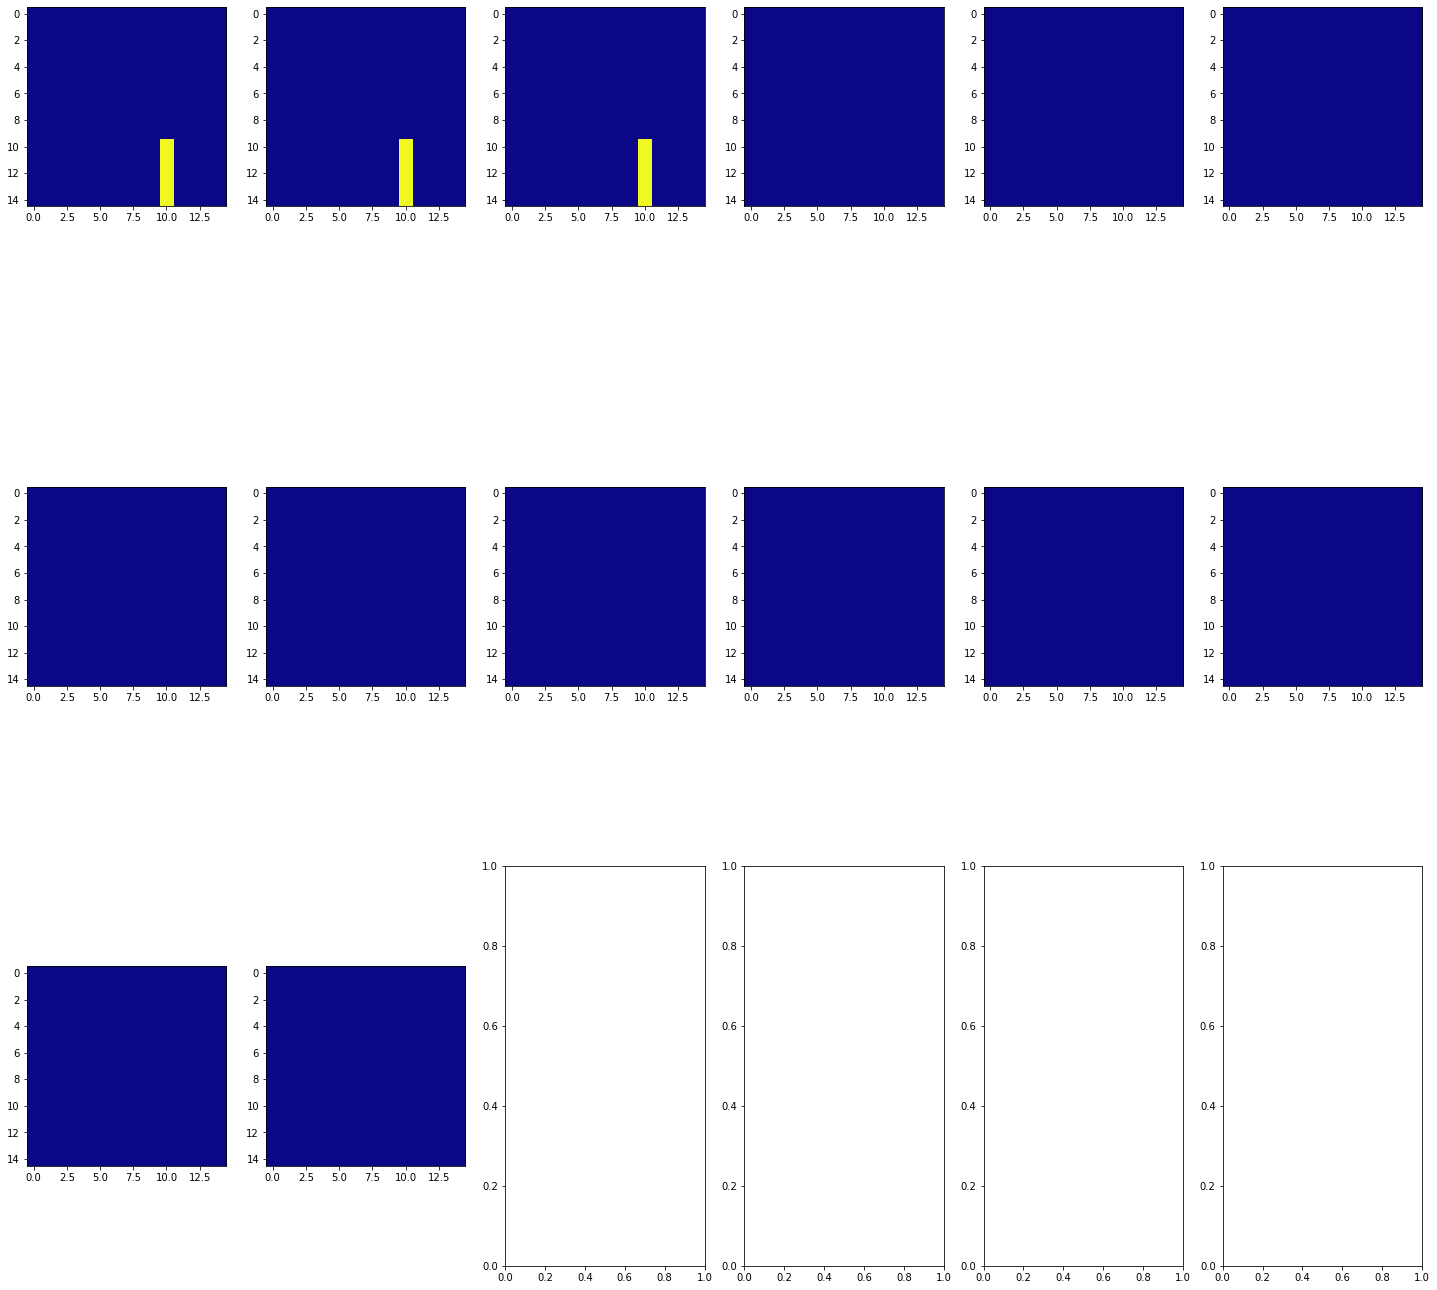

In [104]:
fig, axes = plt.subplots(ncols=6, nrows=3, figsize=(25, 25), facecolor = (STYLE))

axes = axes.ravel() # flats

for index in range(14):
    axes[index].imshow(void[index,:,:], cmap = "plasma")

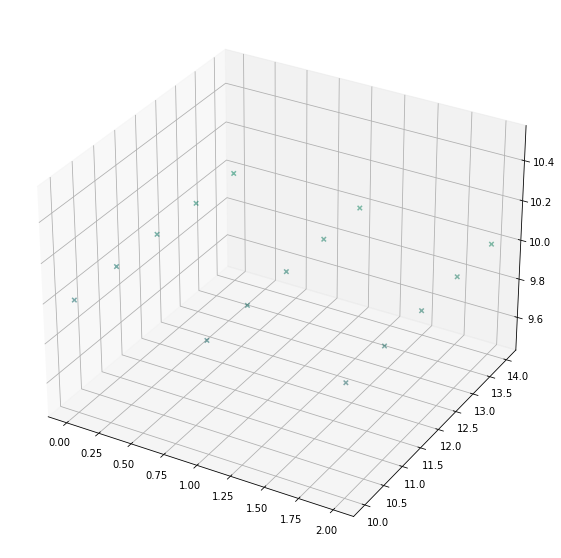

In [105]:
space = np.array(void.nonzero()) # cordinates of the non zero values

space = space.T

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection="3d")

ax.scatter(space[:,0], space[:,1], space[:,2], marker = "x", alpha = 0.5, c=space/28)

In [22]:
# def add_planes_X(void, number_of_planes):
  
#   for plane_X in range(number_of_planes):

#     X = random.randrange(0, 28)

#     Y = random.randrange(3, 18, 2) # np.random.randint(low= 3, high = 16)

#     Z = random.randrange(3, 18, 2)
    
#     CENTER = np.random.randint(low= 7, high = 16, size = (2))
    
#     slide_start_Y = (CENTER[0] - int((Y/2)))
    
#     slide_stop_Y = (CENTER[0] + int((Y/2))+1)
    
#     slide_start_Z = (CENTER[1] - int((Z/2)))
    
#     slide_stop_Z = (CENTER[1] + int((Z/2))+1)

#     print(f"================ Creating Plane Number {plane_X} for X ================")
#     print(f"Chosen [X] Plane number {plane_X} = {X}")
#     print(f"Height [Z] Plane number {plane_X} = {Z}")
#     print(f"Width [Y] Plane number {plane_X} = {Y}")
#     print(f"=========================================================")
#     print(f"Center is coordinates {CENTER[0]}, {CENTER[1]}")
#     print(f"The center on Width [Y] Plane number {plane_X} axis = {int((Y/2)+1)}")
#     print(f"The center on Height [Z] Plane number {plane_X} axis = {int((Z/2)+1)}")
#     print(f"=========================================================")
#     print(f"SLICE ON Y {slide_start_Y} : {slide_stop_Y}")
#     print(f"SLICE ON Z {slide_start_Z} : {slide_stop_Z}")
#     print(f"===============================================================")
#     print("")
    
#     # if TL_coner < 0 or TR_coner < 0 or BL_coner < 0 or BR_coner < 0:
    
#     solid = np.ones((Y, Z))
    
#     void[X, slide_start_Y:slide_stop_Y, slide_start_Z:slide_stop_Z] = solid
  
#   return void